#         Bike Sharing Assignment 

In [2]:
# Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [3]:
import os
os.chdir("C:\Python")

In [4]:
# Reading the file through pandas library using BS as a short form for Bike sharing
BS_df = pd.read_csv('day.csv')

# 1) Understanding and visualising the Data

In [6]:
# Understanding the number of rows and columns
BS_df.shape

(730, 16)

In [7]:
# For checking the total size of the data set
BS_df.size 

11680

In [8]:
# Understanding the number of dimenesions
BS_df.ndim

2

In [9]:
BS_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
BS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [11]:
# For getting statistical insights from the data
BS_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [12]:
# For checking all unique columsns along with their count
BS_df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [13]:
# For checking null values
BS_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
# For checking duplicate values
BS_df.duplicated().sum()

0

There are no null and duplicated values in the data

In [16]:
# For checking all data types of all variables
BS_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# 2) Cleaning Data 

In [18]:
# Dropping the columns
BS_df.drop(['casual', 'registered','dteday', 'instant'], axis=1, inplace=True)

- Columns like casual and registered are dropped as they do not add much value and are not relevant for analysis of target variable
- Column dteday is dropped as we already have data of month and year.
- Column instant is dropped as it is just an index and not relevant for our target varible.

In [20]:
# Checking number of columns after dropped
BS_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
var_list = ['temp','atemp','hum','windspeed','cnt'] 

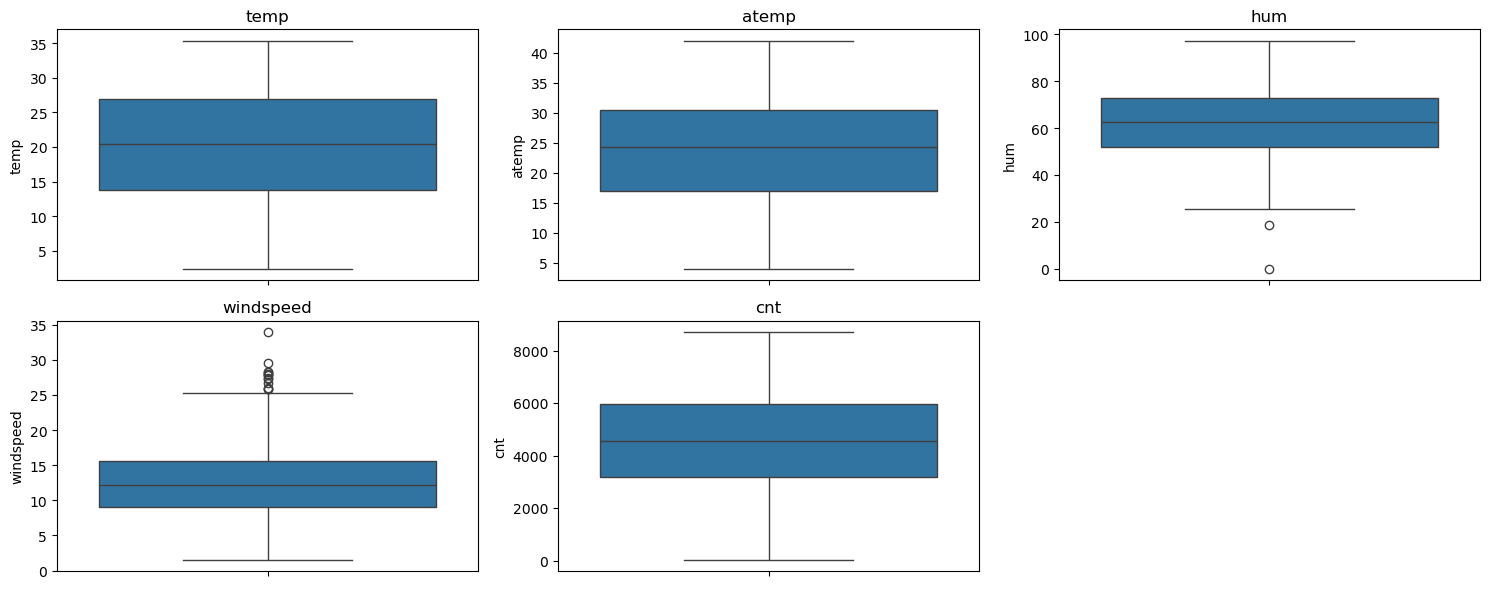

In [22]:
# Ploting a boxplt for checking outliers
plt.figure(figsize = [15,6])
for i, var in enumerate(var_list):
    plt.subplot(2,3,i+1)
    sns.boxplot(BS_df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

- From the above Boxplots we can conclude there are no outliers in the data

# Standardising the Data

Replacing numerical columns to categorical columns for more better analysis

In [26]:
BS_df['season'].replace({1:"spring",2:"summer",3:"fall", 4:"winter"},inplace=True)

In [27]:
# Checking count for Seasons
BS_df['season'].value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [28]:
BS_df['mnth'].replace({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July", 8:"August", 9:"September", 10:"October", 
                         11:"November", 12:"December"}, inplace=True)

In [29]:
# Checking count for month
BS_df['mnth'].value_counts()

mnth
January      62
March        62
May          62
July         62
August       62
October      62
December     62
April        60
June         60
September    60
November     60
February     56
Name: count, dtype: int64

In [30]:
BS_df['weekday'].replace({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday",5:"Friday", 6:"Saturday"}, inplace=True)

In [31]:
# Checking count for weekday
BS_df['weekday'].value_counts()

weekday
Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: count, dtype: int64

In [32]:
BS_df['weathersit'].replace({1:'Clear', 2:'Cloudy', 3:'Light rain',4:'Heavy rain'}, inplace=True)

In [33]:
# Checking count for weathersit
BS_df['weathersit'].value_counts()

weathersit
Clear         463
Cloudy        246
Light rain     21
Name: count, dtype: int64

#  Exploratory Data Analysis

In [35]:
# Making list for all continuous variables
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed','cnt']

### Univaraite analysis for continuous variables through distplot

<Figure size 1500x3000 with 0 Axes>

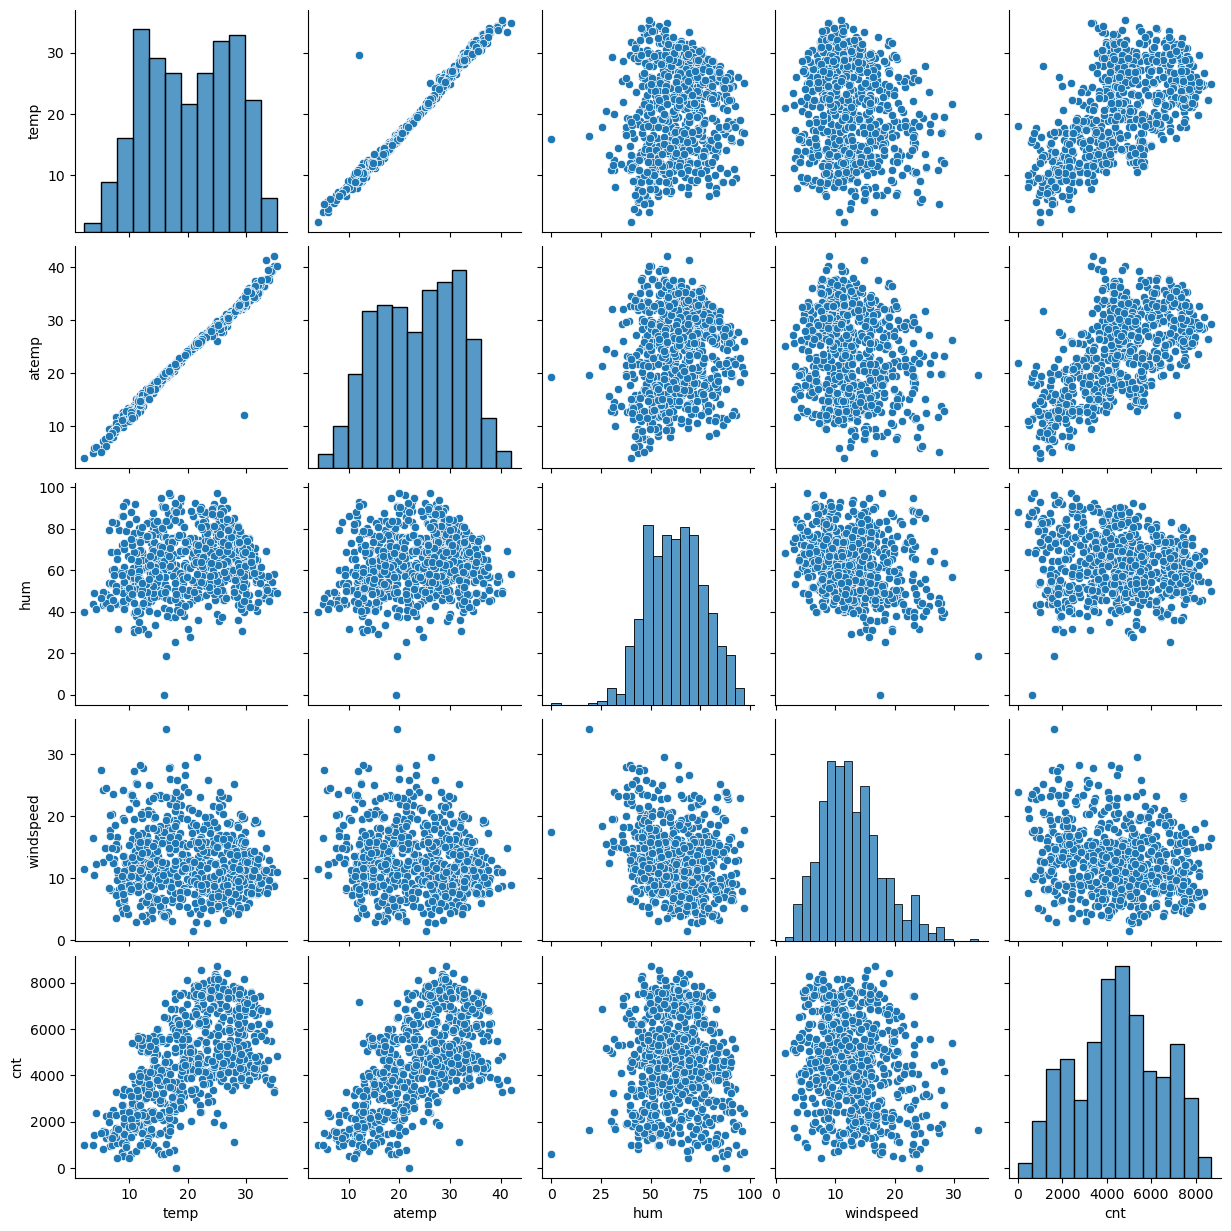

In [37]:
# Visualisng the data through pairplot 
plt.figure(figsize=(15,30))
sns.pairplot(data = BS_df, vars = numerical_columns)
plt.show()

In [38]:
# Checking correlation between continuous variables
BS_df[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


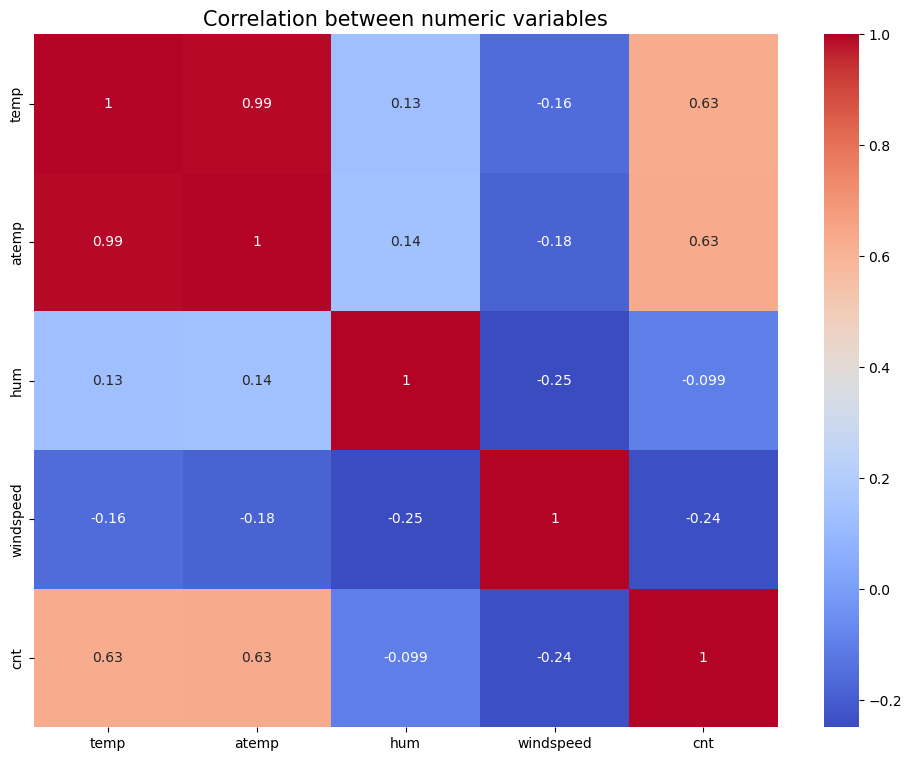

In [39]:
# Visualising the correlation through heatmap
plt.figure(figsize=[12,9])
sns.heatmap(BS_df[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr(), cmap='coolwarm', annot=True)
plt.title("Correlation between numeric variables", fontsize=15)
plt.show()

- From above heatmap we can infer that temp and atemp are highly correlated. Hence we can drop atemp.
- There is a positive corrleation between correlation between atemp and cnt.
  

In [41]:
# Dropping atem column due to high collinearity
BS_df.drop("atemp", axis = 1, inplace=True)

In [42]:
# Creating new list after dropping atemp
numerical_columns = ['temp','hum', 'windspeed','cnt']

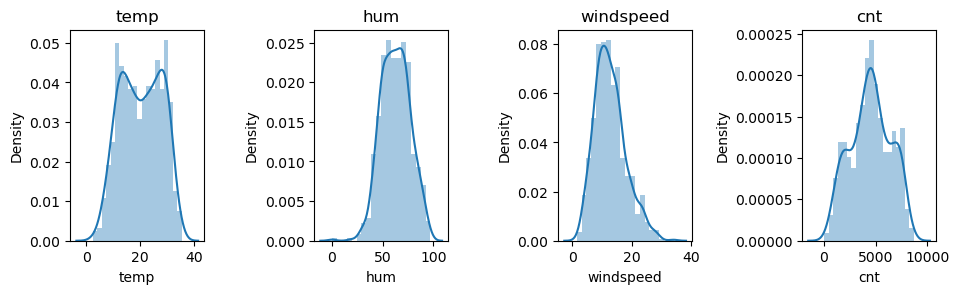

In [43]:
# Visualisng the Data through Distplot
plt.figure(figsize=(12,8))
for x in numerical_columns:
    plt.subplot(3,5,numerical_columns.index(x)+1)
    sns.distplot(BS_df[x],kde=True,bins=20)
    plt.title(x)
plt.tight_layout()
plt.show()

In [44]:
# Creating a list for all continuous variables
categorical_columns = ['season', 'weekday', 'weathersit','mnth','holiday','workingday','yr']

### Univaraite analysis for categorical variables

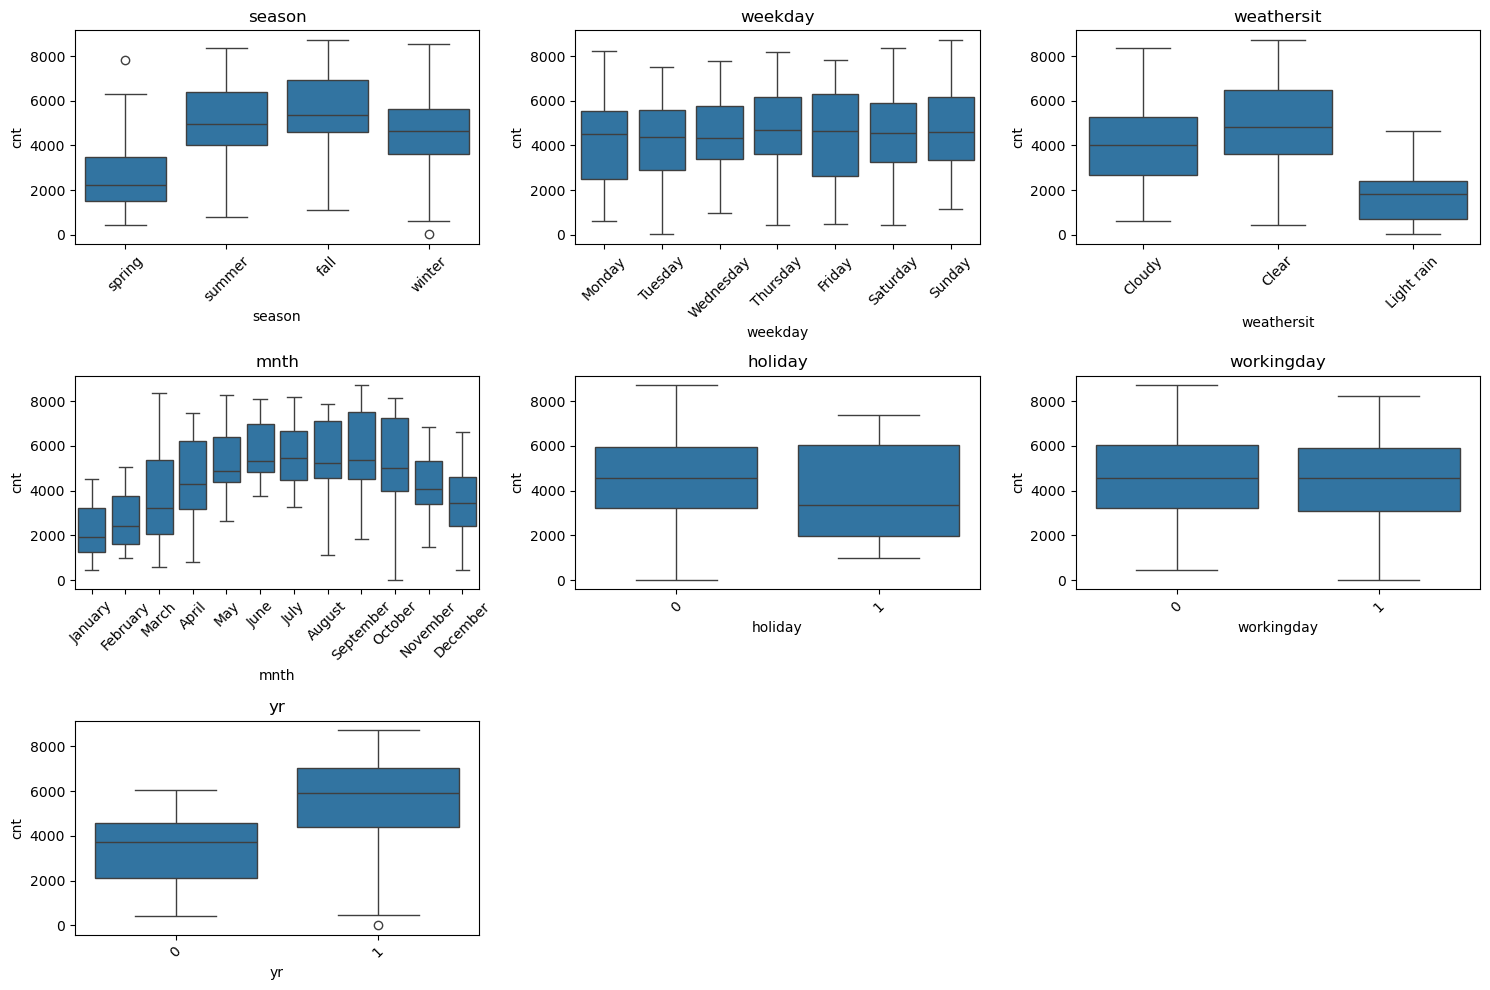

In [46]:
# plotting bocplot for visualisation of data
plt.figure(figsize = [15,10])
for i, var in enumerate(categorical_columns ):
    plt.subplot(3,3,i+1)
    sns.boxplot(x =BS_df[var], y='cnt', data=BS_df)
    plt.xticks(rotation =45)
    plt.title(var)
plt.tight_layout()
plt.show()

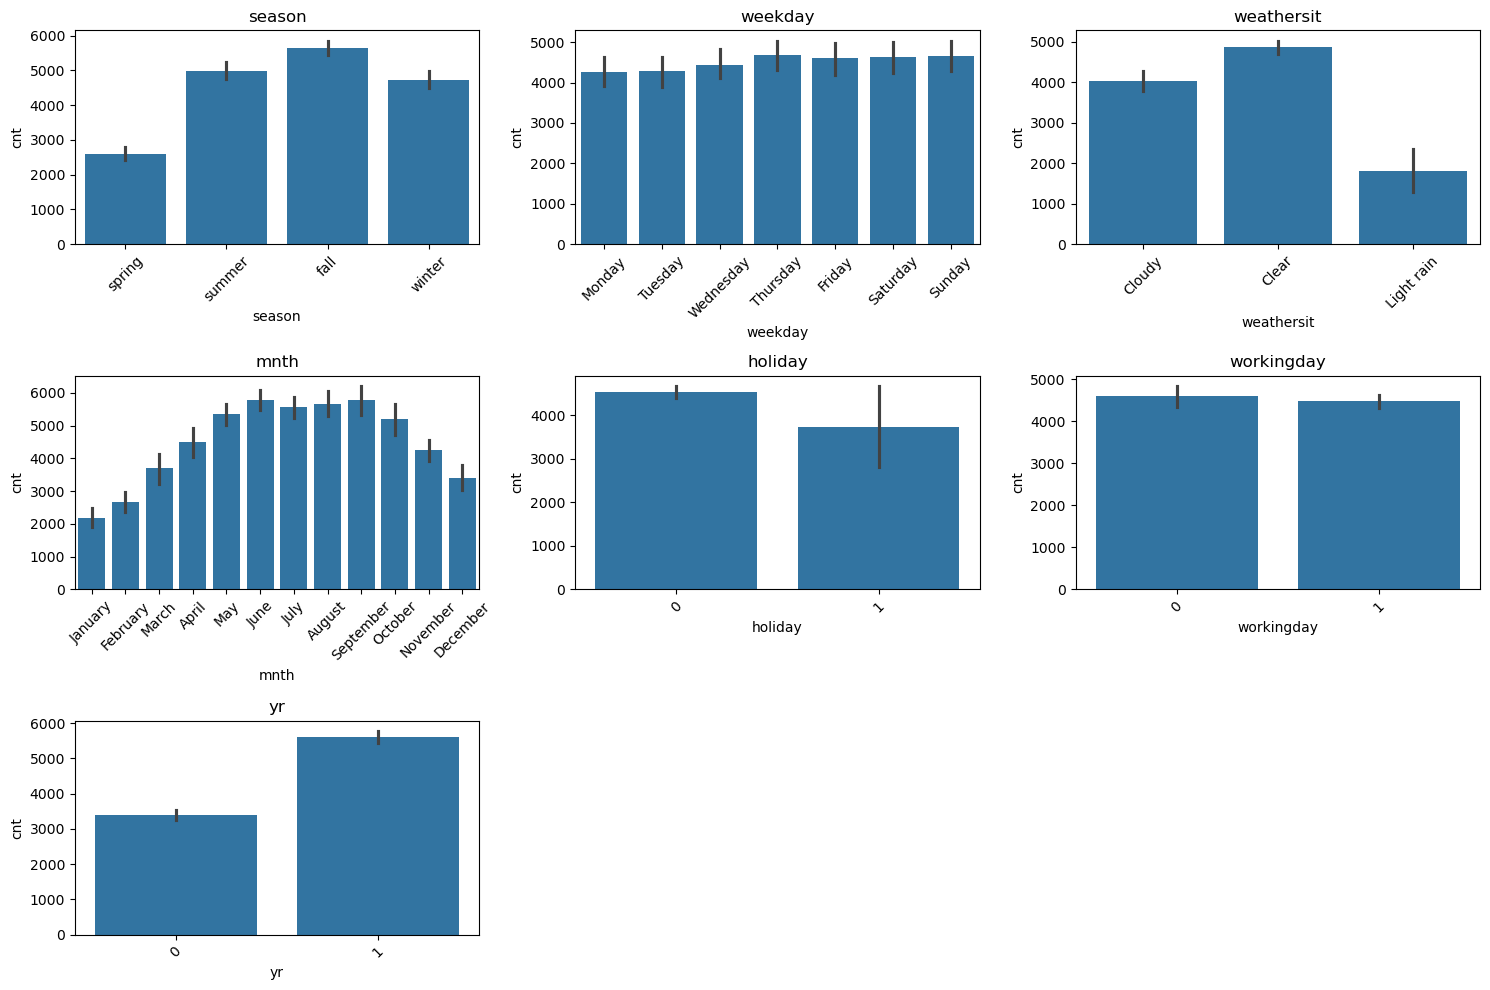

In [47]:
# Visualising the categorical columns through Bar plot
plt.figure(figsize = [15,10])
for i, var in enumerate(categorical_columns ):
    plt.subplot(3,3,i+1)
    sns.barplot(x =BS_df[var], y='cnt', data=BS_df)
    plt.xticks(rotation =45)
    plt.title(var)
plt.tight_layout()
plt.show()

- Rainfall is most prefressed season for Bike rental,  followed by Summer.
- Thrusday and Friday are most preferred days for Bike rentals.
- There is a high demand for bike sharing in the month of June September and August.
- The demand for rental bikes high during working day rather than holiday.
- There is a significant growth in demand for bikes in 2019 than 2018.

# Getting Data Ready for Linear Regression

In [50]:
# Creating dummy variables for categorical columns
BS_df = pd.get_dummies(data = BS_df, columns = ["season","mnth","weekday"], drop_first = True, dtype =int)

In [51]:
# Creating dummy for weather 
BS_df = pd.get_dummies(data = BS_df, columns = ['weathersit'], drop_first = True, dtype =int)

In [52]:
# Understanding the rows and columns of dummy variables
BS_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light rain
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
BS_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Cloudy', 'weathersit_Light rain'],
      dtype='object')

In [54]:
BS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   hum                    730 non-null    float64
 5   windspeed              730 non-null    float64
 6   cnt                    730 non-null    int64  
 7   season_spring          730 non-null    int32  
 8   season_summer          730 non-null    int32  
 9   season_winter          730 non-null    int32  
 10  mnth_August            730 non-null    int32  
 11  mnth_December          730 non-null    int32  
 12  mnth_February          730 non-null    int32  
 13  mnth_January           730 non-null    int32  
 14  mnth_July              730 non-null    int32  
 15  mnth_J

In [55]:
# Using train_test_split function from Sklearn library to divide the data into train and test
df_train, df_test = train_test_split(BS_df, train_size=0.7, test_size=0.3, random_state=100)

In [56]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light rain
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [57]:
# Checking the shape of new train data
df_train.shape

(510, 29)

In [58]:
# Checking correlation for new data
df_train.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light rain
yr,1.000000,-0.014980,-0.003005,0.107288,-0.084792,-0.001108,0.591508,-0.036320,0.013856,-0.022638,...,-0.018790,0.002574,-0.033817,-0.017733,0.016537,0.032785,0.026024,0.010995,-0.015469,-6.076399e-02
holiday,-0.014980,1.000000,-0.254149,-0.066282,-0.029093,0.017569,-0.095961,0.053339,-0.063232,0.050712,...,-0.005387,0.043692,-0.069242,-0.025291,-0.028355,-0.066102,0.034971,0.190636,-0.038279,-2.815377e-02
workingday,-0.003005,-0.254149,1.000000,-0.007643,0.020701,-0.002504,-0.008723,-0.032886,0.030488,0.036097,...,0.025939,-0.034746,0.272446,-0.605864,-0.626783,0.260091,0.234321,0.163120,-0.068924,8.289412e-03
temp,0.107288,-0.066282,-0.007643,1.000000,0.155415,-0.187396,0.643517,-0.605988,0.125582,-0.233697,...,-0.018709,0.207457,-0.037708,0.025276,0.006854,0.074973,-0.001951,-0.046291,-0.090161,-3.609266e-02
hum,-0.084792,-0.029093,0.020701,0.155415,1.000000,-0.266895,-0.059993,-0.201134,-0.013216,0.171579,...,0.162014,0.152628,-0.030499,0.002783,-0.027388,-0.056997,0.033548,0.026395,0.481042,2.450381e-01
windspeed,-0.001108,0.017569,-0.002504,-0.187396,-0.266895,1.000000,-0.253794,0.180743,0.110089,-0.090649,...,-0.018973,-0.121734,0.035390,-0.016284,0.018278,-0.021502,0.035616,-0.057518,-0.030385,8.689990e-02
cnt,0.591508,-0.095961,-0.008723,0.643517,-0.059993,-0.253794,1.000000,-0.548871,0.134343,0.032636,...,0.065692,0.201327,-0.071188,0.012496,0.031237,0.110430,-0.018885,-0.019578,-0.175530,-2.265984e-01
season_spring,-0.036320,0.053339,-0.032886,-0.605988,-0.201134,0.180743,-0.548871,1.000000,-0.322955,-0.326377,...,-0.174161,-0.167580,0.010007,-0.000641,0.013022,-0.048931,-0.012251,0.002987,0.013970,-4.455809e-02
season_summer,0.013856,-0.063232,0.030488,0.125582,-0.013216,0.110089,0.134343,-0.322955,1.000000,-0.328116,...,-0.175089,-0.168473,-0.017169,-0.002397,-0.015325,0.066484,-0.001490,-0.012151,0.039442,-4.523062e-02
season_winter,-0.022638,0.050712,0.036097,-0.233697,0.171579,-0.090649,0.032636,-0.326377,-0.328116,1.000000,...,0.533619,-0.020175,0.016635,-0.019389,-0.032037,-0.054098,0.045054,0.050608,0.023127,1.144484e-01


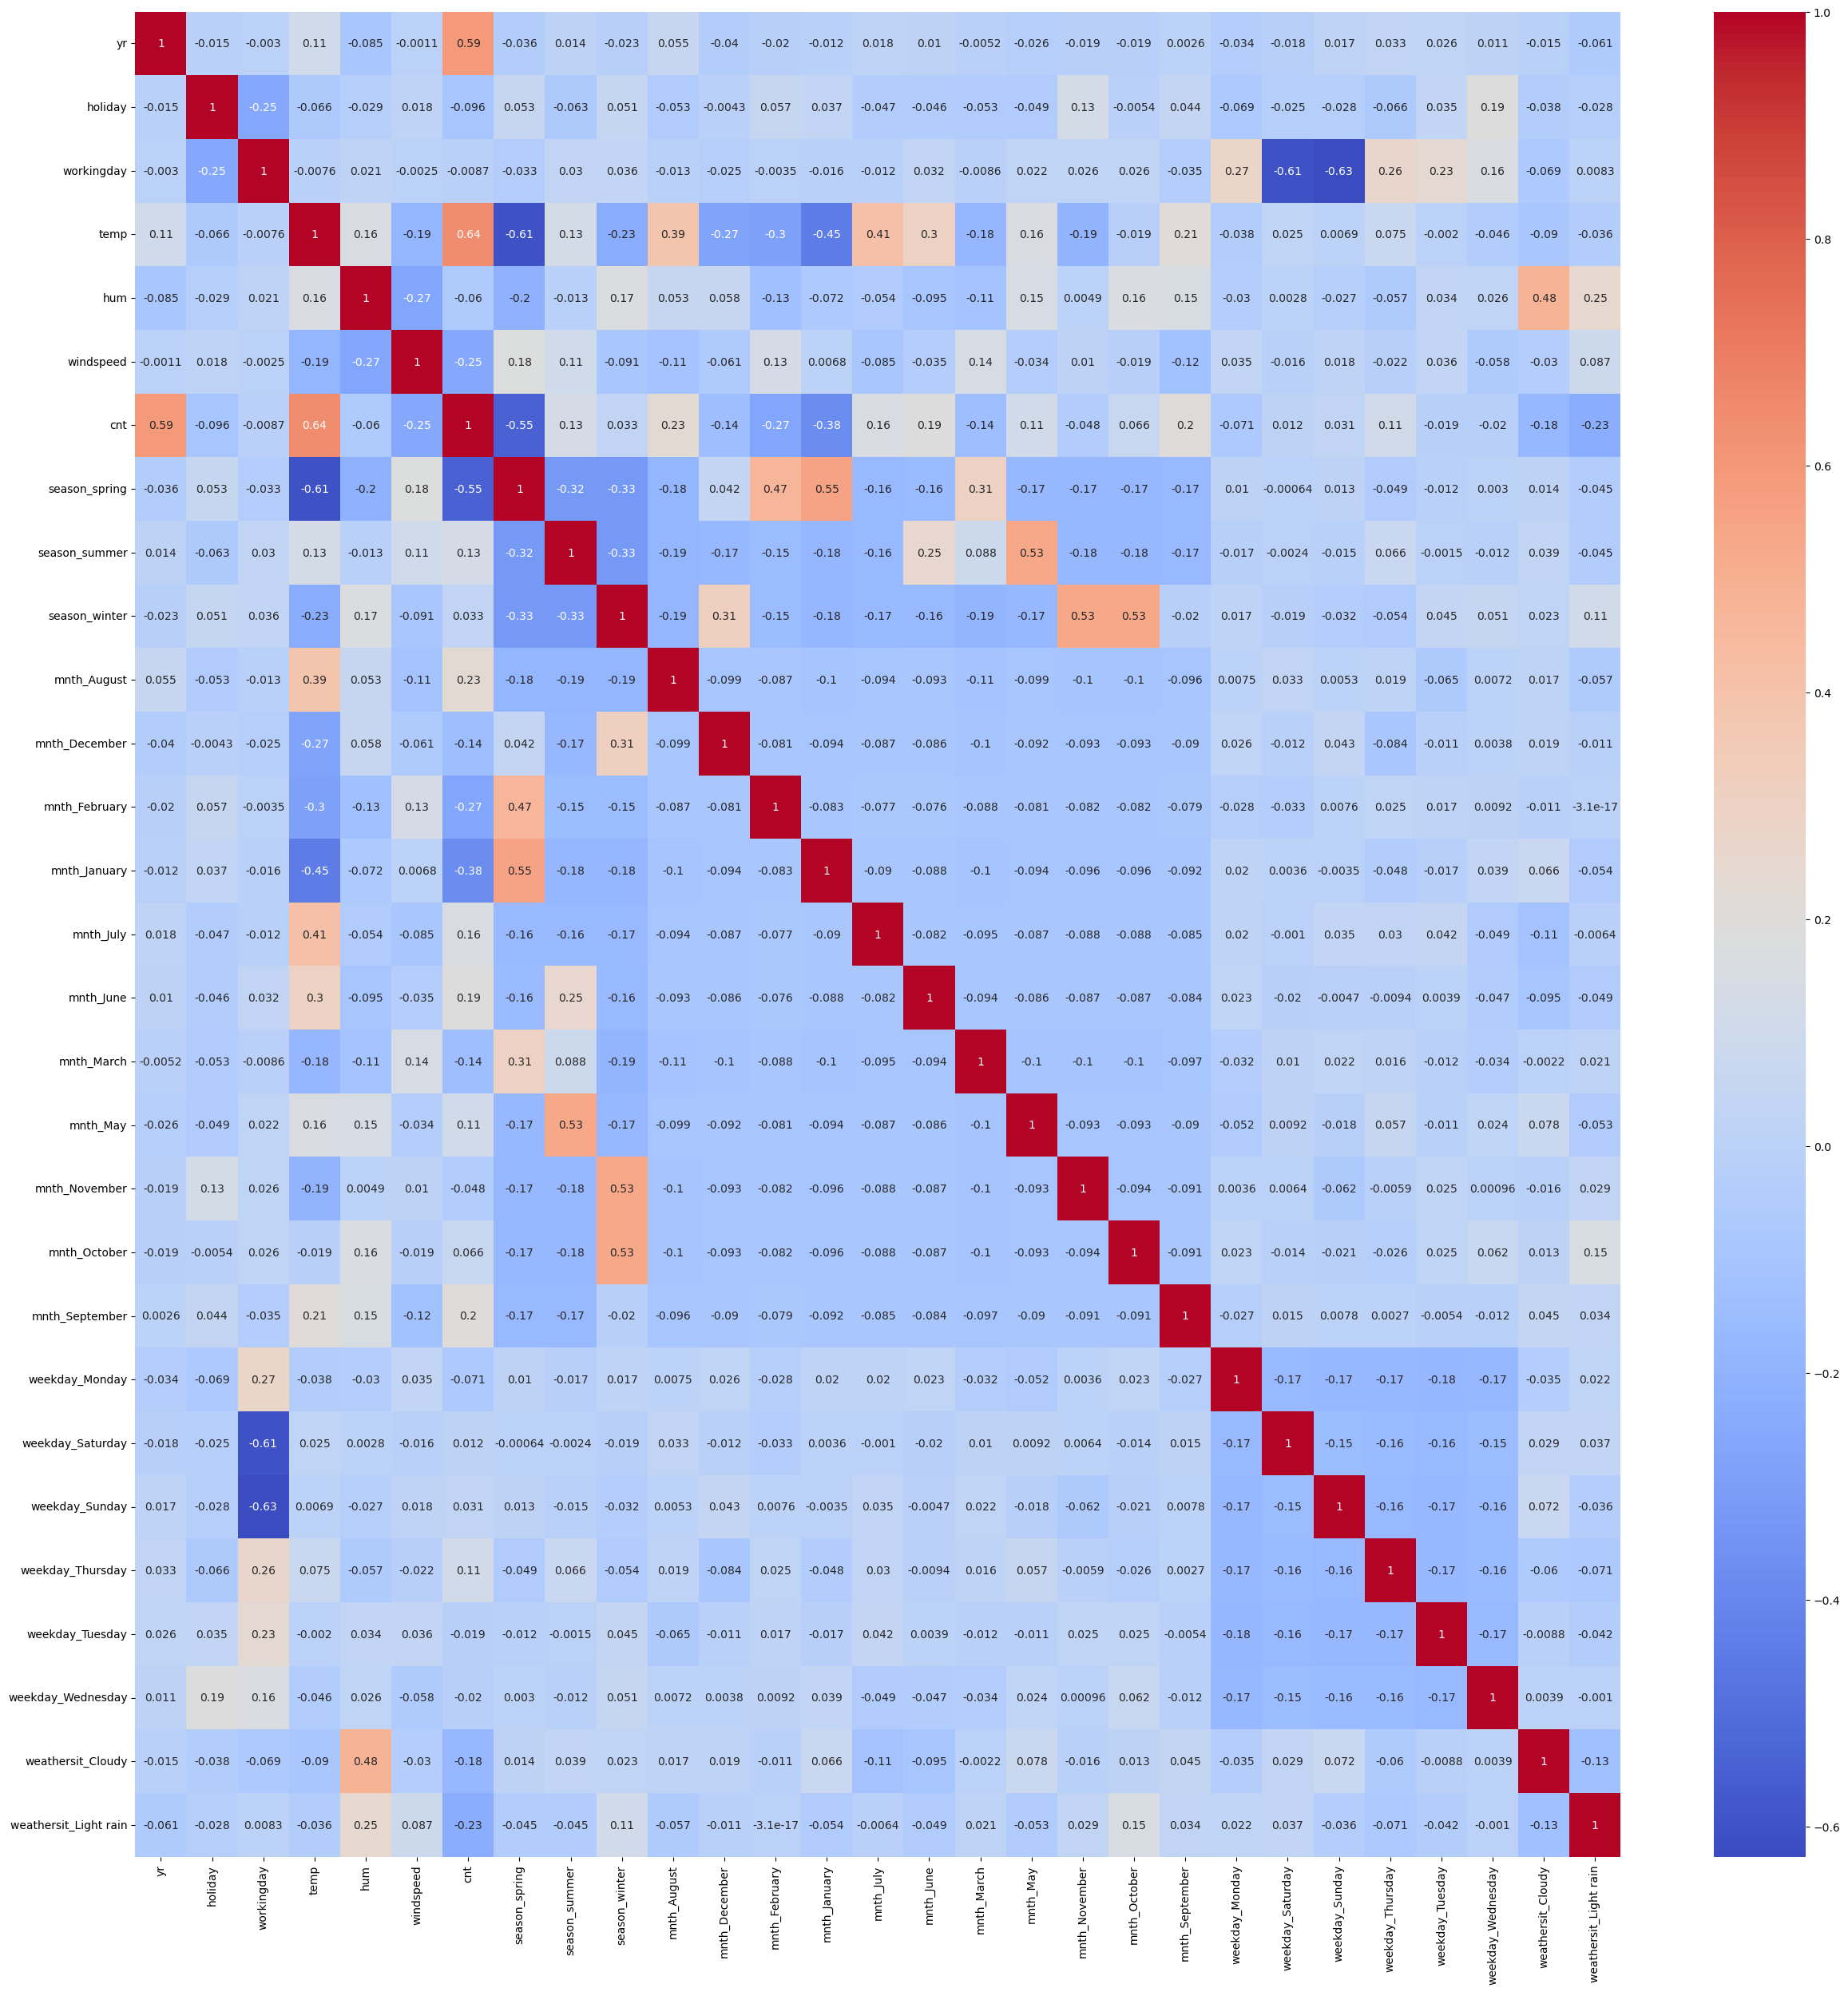

In [59]:
# Visualising the data through heatmap
plt.figure(figsize=[30,30])
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm")
plt.show()

In [60]:
# Using MinMax Scaler function from SKlearn Library
scaler = MinMaxScaler()

In [61]:
numerical_columns = ['temp','hum','windspeed','cnt']

In [2]:

df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])

NameError: name 'scaler' is not defined

In [63]:
# Creating seperate variables for dependent and independent variables
y_train = df_train.pop('cnt')
X_train = df_train

In [64]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_August,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light rain
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [65]:
X_train.shape

(510, 28)

# Building and testing the Model

In [67]:
# Building a model with all variables using statmodels Library
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()
lr.params

const                    0.394543
yr                       0.230857
holiday                 -0.135424
workingday              -0.060524
temp                     0.445458
hum                     -0.157315
windspeed               -0.183046
season_spring           -0.043705
season_summer            0.042243
season_winter            0.110897
mnth_August              0.021507
mnth_December           -0.045669
mnth_February           -0.037279
mnth_January            -0.063612
mnth_July               -0.034910
mnth_June                0.000975
mnth_March               0.000608
mnth_May                 0.024064
mnth_November           -0.041555
mnth_October             0.005790
mnth_September           0.086055
weekday_Monday          -0.024633
weekday_Saturday        -0.056319
weekday_Sunday          -0.049961
weekday_Thursday         0.003863
weekday_Tuesday         -0.026299
weekday_Wednesday       -0.011241
weathersit_Cloudy       -0.059355
weathersit_Light rain   -0.251511
dtype: float64

In [68]:
# Using Linear regression function from Library
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [69]:
print(lm.coef_)

[ 0.23085682 -0.13542389 -0.06052424  0.44545797 -0.15731473 -0.18304612
 -0.04370474  0.04224289  0.11089693  0.02150709 -0.04566922 -0.03727876
 -0.06361179 -0.03490968  0.00097451  0.00060798  0.02406416 -0.04155465
  0.00578994  0.08605503 -0.02463298 -0.05631912 -0.04996141  0.00386328
 -0.02629921 -0.01124081 -0.05935514 -0.25151085]


In [70]:
print(lm.intercept_)

0.3945428483421005


In [71]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          4.33e-179
Time:                        19:05:10   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3945      0.085      4.640      0.000       0.227       0.562
yr                        0.2309      0.008     28.387      0.000       0.215       0.247
holiday                  -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday               -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp                      0.4455      0.047      9.513      0.000       0.353       0.537
hum                      -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed                -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring            -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer             0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter             0.1109      0.028      3.938      0.000       0.056       0.166
mnth_August               0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_December            -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_February            -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_January             -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_July                -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_June                 0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_March                0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May                  0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_November            -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_October              0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_September            0.0861      0.032      2.667      0.008       0.023       0.149
weekday_Monday           -0.0246      0.015     -1.690      0.092      -0.053       0.004
weekday_Saturday         -0.0563      0.072     -0.787      0.432      -0.197       0.084
weekday_Sunday           -0.0500      0.071     -0.699      0.485      -0.190       0.091
weekday_Thursday          0.0039      0.015      0.258      0.796      -0.026       0.033
weekday_Tuesday          -0.0263      0.015     -1.792      0.074      -0.055       0.003
weekday_Wednesday        -0.0112      0.015     -0.736      0.462      -0.041       0.019
weathersit_Cloudy        -0.0594      0.011     -5.637      0.000      -0.080      -0.039
weathersit_Light rain    -0.2515      0.027     -9.455      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarqu

Since there are many varaible in the model and it is not feasiable to do analysis with so many varaibles. Hence we will use 
Recursive Feature Elimination feature from Sklearn Library

In [73]:
# Running RFE with 15 Variables
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 9),
 ('mnth_December', True, 1),
 ('mnth_February', False, 2),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 14),
 ('mnth_May', False, 6),
 ('mnth_November', True, 1),
 ('mnth_October', False, 11),
 ('mnth_September', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', False, 4),
 ('weekday_Sunday', False, 5),
 ('weekday_Thursday', False, 12),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 10),
 ('weathersit_Cloudy', True, 1),
 ('weathersit_Light rain', True, 1)]

In [75]:
# Using RFE support function for all columns of Xtrain
col = X_train.columns[rfe.support_]

In [76]:
# Creating the DataFrame
X_train_rfe = X_train[col]

In [77]:
# Adding the constant 
X_train_rfe = sm.add_constant(X_train_rfe)

In [78]:
X_train_rfe.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Cloudy,weathersit_Light rain
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0


In [79]:
# Using OLS method to fit the model
lm = sm.OLS(y_train, X_train_rfe).fit()

In [80]:
lm.params

const                    0.320243
yr                       0.230328
holiday                 -0.091228
temp                     0.479977
hum                     -0.160227
windspeed               -0.188457
season_spring           -0.061737
season_summer            0.040767
season_winter            0.103435
mnth_December           -0.037199
mnth_January            -0.043748
mnth_July               -0.055495
mnth_November           -0.040949
mnth_September           0.074891
weathersit_Cloudy       -0.055876
weathersit_Light rain   -0.248116
dtype: float64

In [81]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          3.34e-189
Time:                        19:05:10   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3202      0.036      8.886      0.000       0.249       0.391
yr                        0.2303      0.008     28.511      0.000       0.214       0.246
holiday                  -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                      0.4800      0.037     12.977      0.000       0.407       0.553
hum                      -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring            -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer             0.0408      0.015      2.659      0.008       0.011       0.071
season_winter             0.1034      0.018      5.763      0.000       0.068       0.139
mnth_December            -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_January             -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_July                -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_November            -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_September            0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Cloudy        -0.0559      0.010     -5.338      0.000      -0.076      -0.035
weathersit_Light rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 1

In [83]:
# Checking Data Frame to get VIF 
vif = pd.DataFrame()
vif["Features"] = X_train_rfe.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
6,season_spring,5.27
3,temp,4.42
8,season_winter,3.83
7,season_summer,2.76
4,hum,1.93
12,mnth_November,1.76
10,mnth_January,1.68
14,weathersit_Cloudy,1.57
9,mnth_December,1.49


In [84]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          3.34e-189
Time:                        19:05:10   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3202      0.036      8.886      0.000       0.249       0.391
yr                        0.2303      0.008     28.511      0.000       0.214       0.246
holiday                  -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                      0.4800      0.037     12.977      0.000       0.407       0.553
hum                      -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring            -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer             0.0408      0.015      2.659      0.008       0.011       0.071
season_winter             0.1034      0.018      5.763      0.000       0.068       0.139
mnth_December            -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_January             -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_July                -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_November            -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_September            0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Cloudy        -0.0559      0.010     -5.338      0.000      -0.076      -0.035
weathersit_Light rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 2

### Dropping column const due to high VIF 

In [87]:
X_train_rfe1 = X_train_rfe.drop("const", axis = 1)

In [88]:
# Rerunning the Dataframe to check VIF 
vif = pd.DataFrame()
vif["Features"] = X_train_rfe1.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
13,weathersit_Cloudy,2.32
0,yr,2.09
11,mnth_November,1.83
9,mnth_January,1.75


In [89]:
# Adding constant to model
X_train_lm1 = sm.add_constant(X_train_rfe1)
lr2 = sm.OLS(y_train, X_train_lm1).fit()

In [90]:
lr2.params

const                    0.320243
yr                       0.230328
holiday                 -0.091228
temp                     0.479977
hum                     -0.160227
windspeed               -0.188457
season_spring           -0.061737
season_summer            0.040767
season_winter            0.103435
mnth_December           -0.037199
mnth_January            -0.043748
mnth_July               -0.055495
mnth_November           -0.040949
mnth_September           0.074891
weathersit_Cloudy       -0.055876
weathersit_Light rain   -0.248116
dtype: float64

In [91]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          3.34e-189
Time:                        19:05:10   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.3202      0.036      8.886      0.000       0.249       0.391
yr                        0.2303      0.008     28.511      0.000       0.214       0.246
holiday                  -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp                      0.4800      0.037     12.977      0.000       0.407       0.553
hum                      -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed                -0.1885      0.026     -7.312      0.000      -0.239      -0.138
season_spring            -0.0617      0.021     -2.907      0.004      -0.103      -0.020
season_summer             0.0408      0.015      2.659      0.008       0.011       0.071
season_winter             0.1034      0.018      5.763      0.000       0.068       0.139
mnth_December            -0.0372      0.017     -2.131      0.034      -0.071      -0.003
mnth_January             -0.0437      0.018     -2.415      0.016      -0.079      -0.008
mnth_July                -0.0555      0.018     -3.046      0.002      -0.091      -0.020
mnth_November            -0.0409      0.019     -2.187      0.029      -0.078      -0.004
mnth_September            0.0749      0.017      4.438      0.000       0.042       0.108
weathersit_Cloudy        -0.0559      0.010     -5.338      0.000      -0.076      -0.035
weathersit_Light rain    -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model 3

### Dropping Column hum due to high Variance Inflation Factor

In [94]:
X_train_rfe2 =X_train_rfe1.drop("hum", axis=1)

In [95]:
X_train_lm2 = sm.add_constant(X_train_rfe2)

In [96]:
lr3 = sm.OLS(y_train, X_train_lm2).fit()

In [97]:
lr3.params

const                    0.246635
yr                       0.234287
holiday                 -0.091915
temp                     0.437655
windspeed               -0.158596
season_spring           -0.071640
season_summer            0.033271
season_winter            0.088652
mnth_December           -0.044529
mnth_January            -0.050270
mnth_July               -0.050376
mnth_November           -0.041852
mnth_September           0.068219
weathersit_Cloudy       -0.081442
weathersit_Light rain   -0.292892
dtype: float64

In [98]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          1.57e-186
Time:                        19:05:11   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2466      0.032      7.679      0.000       0.184       0.310
yr                        0.2343      0.008     28.709      0.000       0.218       0.250
holiday                  -0.0919      0.026     -3.533      0.000      -0.143      -0.041
temp                      0.4377      0.036     12.083      0.000       0.366       0.509
windspeed                -0.1586      0.025     -6.290      0.000      -0.208      -0.109
season_spring            -0.0716      0.021     -3.337      0.001      -0.114      -0.029
season_summer             0.0333      0.015      2.148      0.032       0.003       0.064
season_winter             0.0887      0.018      4.951      0.000       0.053       0.124
mnth_December            -0.0445      0.018     -2.520      0.012      -0.079      -0.010
mnth_January             -0.0503      0.018     -2.738      0.006      -0.086      -0.014
mnth_July                -0.0504      0.018     -2.725      0.007      -0.087      -0.014
mnth_November            -0.0419      0.019     -2.198      0.028      -0.079      -0.004
mnth_September            0.0682      0.017      3.992      0.000       0.035       0.102
weathersit_Cloudy        -0.0814      0.009     -9.359      0.000      -0.099      -0.064
weathersit_Light rain    -0.2929      0.025    -11.908      0.000      -0.341      -0.245
==============================================================================
Omnibus:                       70.031   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.566
Skew:                          -0.702   Prob(JB):                     7.52e-39
Kurtosis:                       5.508   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
vif = pd.DataFrame()
vif["Features"] = X_train_rfe2.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
10,mnth_November,1.80
8,mnth_January,1.66
9,mnth_July,1.59
12,weathersit_Cloudy,1.56


# Model 4

### Dropping column temp due to high Varaince Inflation Factor

In [102]:
X_train_rfe3 =X_train_rfe2.drop("temp",axis=1)

In [103]:
# Creating a dataframe that will reflect VIF for all the variables
vif = pd.DataFrame()
vif["Features"] = X_train_rfe3.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.88
3,season_spring,2.89
5,season_winter,2.84
4,season_summer,2.01
0,yr,1.83
9,mnth_November,1.79
7,mnth_January,1.64
11,weathersit_Cloudy,1.52
6,mnth_December,1.45
8,mnth_July,1.20


In [104]:
# Adding the constant 
X_train_lm3 = sm.add_constant(X_train_rfe3)

In [105]:
lr4 = sm.OLS(y_train, X_train_lm3).fit()

In [106]:
lr4.params

const                    0.596144
yr                       0.245445
holiday                 -0.085646
windspeed               -0.190287
season_spring           -0.250297
season_summer           -0.051118
season_winter           -0.021316
mnth_December           -0.109968
mnth_January            -0.120219
mnth_July               -0.018594
mnth_November           -0.101341
mnth_September           0.052981
weathersit_Cloudy       -0.088232
weathersit_Light rain   -0.312679
dtype: float64

In [107]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Tue, 29 Oct 2024   Prob (F-statistic):          5.50e-160
Time:                        19:05:11   Log-Likelihood:                 439.69
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.5961      0.016     37.557      0.000       0.565       0.627
yr                        0.2454      0.009     26.627      0.000       0.227       0.264
holiday                  -0.0856      0.030     -2.896      0.004      -0.144      -0.028
windspeed                -0.1903      0.029     -6.675      0.000      -0.246      -0.134
season_spring            -0.2503      0.018    -14.146      0.000      -0.285      -0.216
season_summer            -0.0511      0.016     -3.252      0.001      -0.082      -0.020
season_winter            -0.0213      0.018     -1.216      0.225      -0.056       0.013
mnth_December            -0.1100      0.019     -5.752      0.000      -0.148      -0.072
mnth_January             -0.1202      0.020     -6.069      0.000      -0.159      -0.081
mnth_July                -0.0186      0.021     -0.894      0.372      -0.059       0.022
mnth_November            -0.1013      0.021     -4.847      0.000      -0.142      -0.060
mnth_September            0.0530      0.019      2.735      0.006       0.015       0.091
weathersit_Cloudy        -0.0882      0.010     -8.938      0.000      -0.108      -0.069
weathersit_Light rain    -0.3127      0.028    -11.207      0.000      -0.367      -0.258
==============================================================================
Omnibus:                       56.767   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.173
Skew:                          -0.589   Prob(JB):                     4.44e-30
Kurtosis:                       5.230   Cond. No.                         9.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Residual Analysis 

In [109]:
# Creating a variable y_train_pred for predicting the test data
y_train_pred = lr4.predict(X_train_lm3)

### Checking Normality Assumption of Linear regression

Text(0, 0.5, 'Residuals')

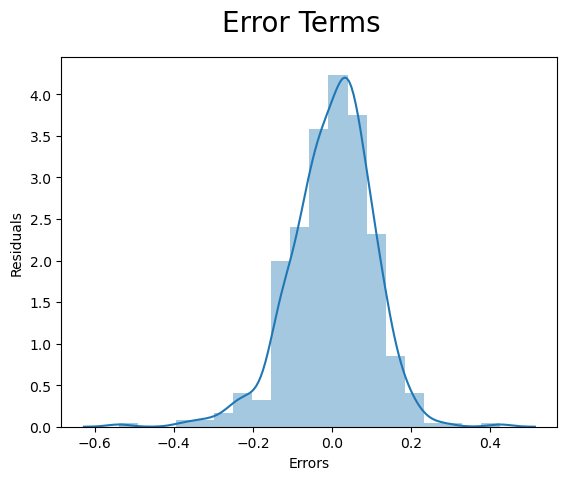

In [111]:
# Plotting a Histogram to check assumption of normal distribution
residual = y_train-y_train_pred
fig = plt.figure()
sns.distplot((residual), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors')  
plt.ylabel("Residuals")

- From the above mentioned plot we can infer there is normal distribution between error terms

### Checking assumption for Homoscedasticity

Text(0, 0.5, 'Predicted points')

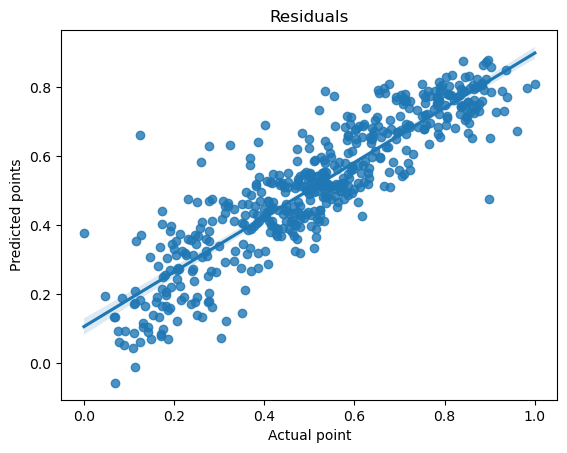

In [114]:
#Plotting a regplot for checkign assumption
fig = plt.figure()
sns.regplot(x = y_train, y = y_train_pred)
plt.title("Residuals")
plt.xlabel("Actual point")
plt.ylabel("Predicted points")

- From above scatter plot we can infer that there is constant variance between residuals

### Checking whether residuals are independent of each other

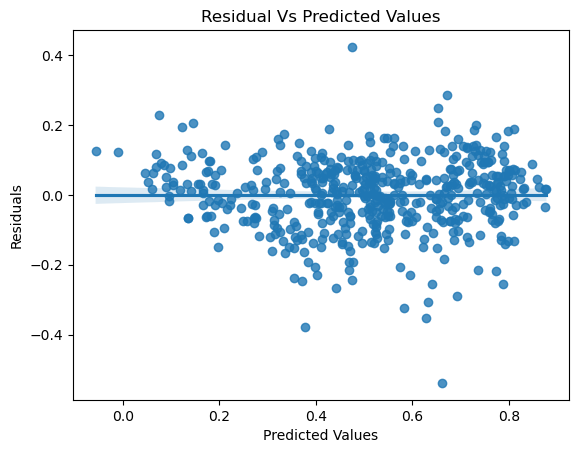

In [118]:
sns.regplot(x = y_train_pred , y = residual)
plt.title("Residual Vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

- From the regplot we can conclude that residuals are independent of each other

### Assumption of Multi collinearity

In [120]:
# Calculating VIF for checking assumption of Multi Collinearity
vif = pd.DataFrame()
vif["Features"] = X_train_rfe3.columns
vif["VIF"] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.88
3,season_spring,2.89
5,season_winter,2.84
4,season_summer,2.01
0,yr,1.83
9,mnth_November,1.79
7,mnth_January,1.64
11,weathersit_Cloudy,1.52
6,mnth_December,1.45
8,mnth_July,1.20


In [122]:
X_train_rfe3.corr()

,yr,holiday,windspeed,season_spring,season_summer,season_winter,mnth_December,mnth_January,mnth_July,mnth_November,mnth_September,weathersit_Cloudy,weathersit_Light rain
yr,1.000000,-0.014980,-0.001108,-0.036320,0.013856,-0.022638,-0.040049,-0.011794,0.017623,-0.018790,0.002574,-0.015469,-0.060764
holiday,-0.014980,1.000000,0.017569,0.053339,-0.063232,0.050712,-0.004302,0.037412,-0.046539,0.127543,0.043692,-0.038279,-0.028154
windspeed,-0.001108,0.017569,1.000000,0.180743,0.110089,-0.090649,-0.060975,0.006793,-0.085478,0.009952,-0.121734,-0.030385,0.086900
season_spring,-0.036320,0.053339,0.180743,1.000000,-0.322955,-0.326377,0.041868,0.548861,-0.163094,-0.174161,-0.167580,0.013970,-0.044558
season_summer,0.013856,-0.063232,0.110089,-0.322955,1.000000,-0.328116,-0.172902,-0.177257,-0.163963,-0.175089,-0.168473,0.039442,-0.045231
season_winter,-0.022638,0.050712,-0.090649,-0.326377,-0.328116,1.000000,0.314816,-0.179136,-0.165701,0.533619,-0.020175,0.023127,0.114448
mnth_December,-0.040049,-0.004302,-0.060975,0.041868,-0.172902,0.314816,1.000000,-0.094396,-0.087317,-0.093241,-0.089718,0.018507,-0.011056
mnth_January,-0.011794,0.037412,0.006793,0.548861,-0.177257,-0.179136,-0.094396,1.000000,-0.089516,-0.095590,-0.091978,0.066382,-0.054153
mnth_July,0.017623,-0.046539,-0.085478,-0.163094,-0.163963,-0.165701,-0.087317,-0.089516,1.000000,-0.088421,-0.085080,-0.114731,-0.006422
mnth_November,-0.018790,0.127543,0.009952,-0.174161,-0.175089,0.533619,-0.093241,-0.095590,-0.088421,1.000000,-0.090853,-0.016152,0.029177


- The Variance Inflation Factor for all variables is less than 5. Hence the assumption of multi-collinearity holds true.

# Model Prediction on test data

In [128]:
numerical_columns = ['temp', 'hum', 'windspeed','cnt']

In [130]:
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

In [132]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light rain
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [134]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     219 non-null    int64  
 1   holiday                219 non-null    int64  
 2   workingday             219 non-null    int64  
 3   temp                   219 non-null    float64
 4   hum                    219 non-null    float64
 5   windspeed              219 non-null    float64
 6   cnt                    219 non-null    float64
 7   season_spring          219 non-null    int32  
 8   season_summer          219 non-null    int32  
 9   season_winter          219 non-null    int32  
 10  mnth_August            219 non-null    int32  
 11  mnth_December          219 non-null    int32  
 12  mnth_February          219 non-null    int32  
 13  mnth_January           219 non-null    int32  
 14  mnth_July              219 non-null    int32  
 15  mnth_June 

In [136]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday', 'weathersit_Cloudy', 'weathersit_Light rain'],
      dtype='object')

In [138]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [140]:
y_test = df_test.pop("cnt")
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   yr                     219 non-null    int64  
 1   holiday                219 non-null    int64  
 2   workingday             219 non-null    int64  
 3   temp                   219 non-null    float64
 4   hum                    219 non-null    float64
 5   windspeed              219 non-null    float64
 6   season_spring          219 non-null    int32  
 7   season_summer          219 non-null    int32  
 8   season_winter          219 non-null    int32  
 9   mnth_August            219 non-null    int32  
 10  mnth_December          219 non-null    int32  
 11  mnth_February          219 non-null    int32  
 12  mnth_January           219 non-null    int32  
 13  mnth_July              219 non-null    int32  
 14  mnth_June              219 non-null    int32  
 15  mnth_March

In [142]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_August,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Cloudy,weathersit_Light rain
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [144]:
X_test = X_test[X_train_rfe3.columns]
X_test_lr = sm.add_constant(X_test)
X_test_lr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   const                  219 non-null    float64
 1   yr                     219 non-null    int64  
 2   holiday                219 non-null    int64  
 3   windspeed              219 non-null    float64
 4   season_spring          219 non-null    int32  
 5   season_summer          219 non-null    int32  
 6   season_winter          219 non-null    int32  
 7   mnth_December          219 non-null    int32  
 8   mnth_January           219 non-null    int32  
 9   mnth_July              219 non-null    int32  
 10  mnth_November          219 non-null    int32  
 11  mnth_September         219 non-null    int32  
 12  weathersit_Cloudy      219 non-null    int32  
 13  weathersit_Light rain  219 non-null    int32  
dtypes: float64(2), int32(10), int64(2)
memory usage: 17.1 KB


In [146]:
y_test_pred = lr4.predict(X_test_lr)

In [148]:
lr4.params

const                    0.596144
yr                       0.245445
holiday                 -0.085646
windspeed               -0.190287
season_spring           -0.250297
season_summer           -0.051118
season_winter           -0.021316
mnth_December           -0.109968
mnth_January            -0.120219
mnth_July               -0.018594
mnth_November           -0.101341
mnth_September           0.052981
weathersit_Cloudy       -0.088232
weathersit_Light rain   -0.312679
dtype: float64

# Generating R Square 

In [150]:
r2_score(y_test, y_test_pred)

0.7764329747476503

In [152]:
r2 = 0.7764

In [154]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2)* (n-1)/ (n-p-1)
adjusted_r2

0.762220487804878

Train R_squared = 0.7764
Train_adjusted R square = 0.76

F statistic = 145.8

### Final Equation

const = 0.5961 + (yr * 0.2454) + (holiday *	-0.0856) + (windspeed *	-0.1903) + (season_spring *	-0.2503) + (season_summer *	-0.0511) + 
(season_winter + -0.0213) + (mnth_December * -0.1100) + (mnth_January * -0.1202) + (mnth_July *	-0.0186) + (mnth_November *	-0.1013) + (mnth_September * 0.0530) + (weathersit_Cloudy * -0.0882) + (weathersit_Light rain * -0.3127) 